<a href="https://colab.research.google.com/github/Narendraiitg/EDA_and_LogisticRegression_On_Titanic/blob/main/EDA_and_LogisticRegression_On_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Breif about the project**

In this project we will be classify survival or deceased. Let's begin our understanding of implementing Logistic Regression in Python for classification.

We'll use a "semi-cleaned" version of the titanic data set

***Import Libraries***


Let's import some libraries to get started!

In [45]:
import pandas as pd  # library helps us to read the data set & most of the preprocessing steps done by the inbuilt functions inside the pandas
import numpy as np # library work with 1D multidimensional array
import matplotlib.pyplot as plt  # library used for visualization
import seaborn as sns # Used for visualization & various statistical concepts
%matplotlib inline

**The Data**

Let's start by reading the titanic_train.csv file into a pandas dataframe.

In [46]:
train= pd.read_csv("/content/titanic_train.csv")

In [47]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Exploratory Data Analysis**

Let's begin some exploratory data analysis! We'll start by checking out missing data!

**Missing Data**

We can use seaborn to create a simple heatmap to see where we are missing data!

In [48]:

train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


True indicates the missing values in the perticular feature but from above we can not easyly say that how many missing values are there in the perticualr columns of dataset, for finding that we need to use the data visualization using heat map of seaborn.

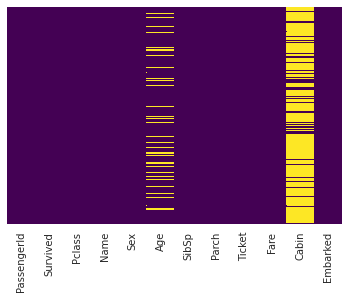

In [49]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In above heat map the null/missing values are shown by the yellow color band so roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of the data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

Let's continue on by visualizing some more of the data!

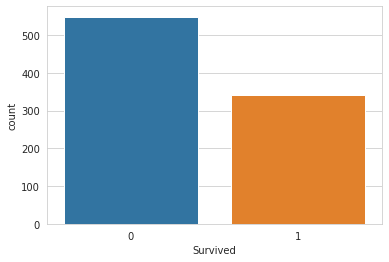

In [50]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train)

From above we can conclude out of 891 persons around 550 peoples will not servive and around 341 peoples will servive

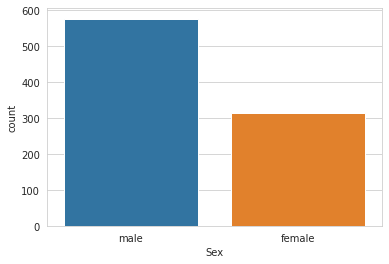

In [51]:
# we can also see the sex count visually
sns.set_style('whitegrid')
sns.countplot(x='Sex', data=train)

So the above countplot shows the numbers of male and females in the sex columns
there are around 575 males and 316 females

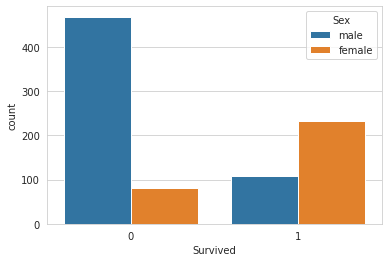

In [52]:
# we can also see the servival data as per the features for example based on the sex
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex', data=train)

From above we can see the count of servival/nonserviaval based on sex

Non servaival count of males are around 490 and wehere as female are 85 in numbers

Survival count of mailes are around 110 and that of females are 206

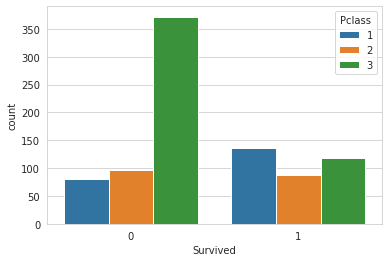

In [53]:
# Lets try to find the realtion between the passenger class and the servival class
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass', data=train)

If we see the non servival part of the above curve that we can say that the passenger class 3 is more likely to be die and passanger calss 1 is less likey to be die
Also if we see the servival part of above curve than we can say that pasanger class 1 are more likely to servive as compared to others ie passenger class 2 & 3

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


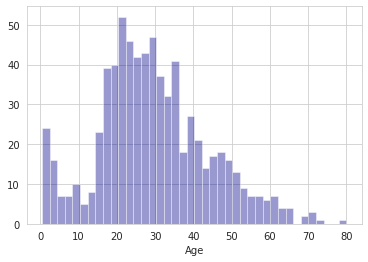

In [54]:
# Lets try to see the distribution of the age like how the age is distributed in the data set
sns.distplot(train['Age'].dropna(), kde= False, color='darkblue',bins=40)

The above plot shows the count of the peoples within the range of the age and we can say that most of the peoples on the titanice were having the age between 17 to 40 years

Also we can observe that the shape of the curve is same as normal distribution function

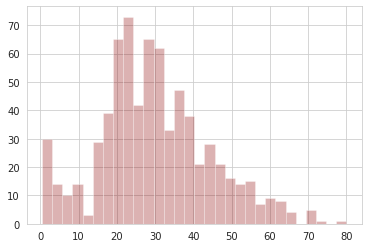

In [55]:
# We can also use the matplot inbulit function to see the same above curve 
train['Age'].hist(bins=30,color='darkred',alpha=0.3)

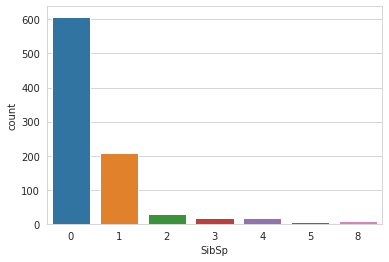

In [56]:
# lets check the count of siblings or spouse
sns.countplot(x='SibSp',data=train)

Most of the popeles are not having any siblings or spouse

# **Data Cleaning**
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation). However we can be smarter about this and check the average age by passenger class. For example:

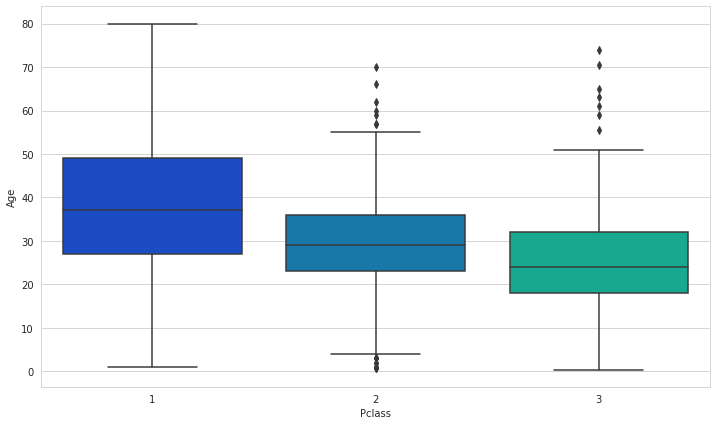

In [57]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

In [58]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [59]:

train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

Now let's check that heat map again!

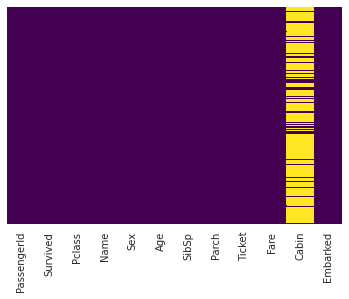

In [60]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Let's go ahead and drop the Cabin column and the row in Embarked that is NaN

In [61]:
train.drop('Cabin',axis=1,inplace=True)

In [62]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# **Converting Categorical Features**

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [63]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [64]:
# Making the two new coloumns for categorial features Embarked and sex
embark=pd.get_dummies(train['Embarked'],drop_first=True)
sex= pd.get_dummies(train['Sex'],drop_first=True)

In [65]:
# We can drop the columns with irrelevant features like passengerID,Name, Ticket, Embarked & sex (will be replace with the new coloumns formed ) 
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [66]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [67]:
# Now we will add the two new columns formed for the categoial data ie sex and embarked
train = pd.concat([train,sex,embark],axis=1) 

In [68]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


Our data is ready for our model!

# **Building a Logistic Regression model**
Let's start by splitting our data into a training set and test set (there is another test.csv file that you can play around with in case you want to use all this data for training).

Train Test Split

In [69]:
train.drop('Survived',axis=1).head() # Droping the target feature/output feature

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [71]:
train['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [72]:
from sklearn.model_selection import train_test_split

In [74]:
# Spiliting the dataset into train and test form with 70:30 
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)

In [75]:
from sklearn.linear_model import LogisticRegression

In [76]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [77]:
predictions = logmodel.predict(X_test)

In [78]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [80]:
con_mat=confusion_matrix(y_test,predictions)
con_mat

array([[134,  20],
       [ 42,  72]])

In [81]:
accuracy=accuracy_score(y_test,predictions)
accuracy

0.7686567164179104

So accuracy of the model is 76 % for predictions on the test data 

# **Evaluation**
We can check precision,recall,f1-score using classification report!

In [82]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.76      0.87      0.81       154
           1       0.78      0.63      0.70       114

    accuracy                           0.77       268
   macro avg       0.77      0.75      0.76       268
weighted avg       0.77      0.77      0.76       268

